In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# Import dataset
data = pd.read_csv("dataset/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-27,311.119995,311.796661,276.333344,276.366669,276.366669,147109500
1,2022-01-28,277.186676,285.833344,264.003326,282.116669,282.116669,134789100
2,2022-01-31,290.903320,312.663330,287.350006,312.239990,312.239990,104436000
3,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200
4,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900


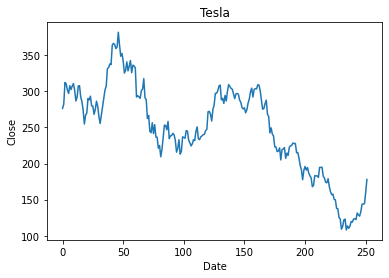

In [3]:
# mari kita visualisasikan kolom "Close" di kumpulan data yang mewakili harga penutupan setiap hari:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

+ Kami hanya membutuhkan dua kolom dari kumpulan data ini (Tanggal dan Tutup), jadi mari buat DataFrame baru hanya dengan dua kolom ini:




In [4]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

+ Karena kami menggunakan Facebook prophet model di sini untuk memprediksi harga saham Tesla, maka kami perlu mengganti nama kolom:

In [5]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [6]:
# Now let's price predicted with prophet model:

model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.08756
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        485.06     0.0120473        135.27           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       485.677    0.00242602       93.8414   3.964e-05       0.001      180  LS failed, Hessian reset 
     186       485.805   8.06295e-07       71.2932   1.074e-08       0.001      321  LS failed, Hessian reset 
     199       485.805   3.38743e-08       63.1325           1           1      337   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds,yhat,yhat_lower,yhat_upper
612,2024-01-23,-299.397854,-412.494966,-173.842382
613,2024-01-24,-299.659666,-409.924741,-176.979631
614,2024-01-25,-301.578497,-419.162321,-177.689510
615,2024-01-26,-303.631961,-417.212193,-180.281011
616,2024-01-27,-323.822313,-436.033897,-197.368848


In [7]:
# Setting ukuran grafik yang akan di tampilkan
import matplotlib.pyplot as plt  # Untuk menampikan grafik 
plt.rcParams["figure.figsize"] = (20,6)  

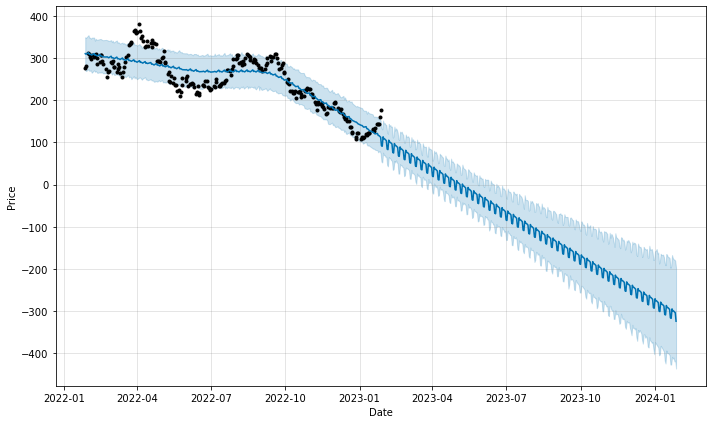

In [8]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

# Kesimpulan sementara:

+ Sepertinya harga saham Tesla akan turun di masa mendatang jika mereka tidak memunculkan ide baru untuk merepresentasikan visi mereka. Ini dimungkinkan karena perusahaan lain juga sudah mulai memproduksi kendaraan listrik dengan harga yang sangat murah dibandingkan dengan Tesla.